# Wizualizacje i analiza danych

Celem tego notatnika jest stworzenie wizualizacji danych, które pozwolą nam określić korelacje występujące w danych dotyczących wyników końcowych. Wizualizacje i płynące z nich wnioski zostaną dokładnie opisane w raporcie, tutaj jedynie pokrótce.
W tym celu skorzystamy z poniżej zaimportowanych bibliotek i plików o rozszerzeniu csv:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Plik csv w którym znajdują się wartości związane z klubami w danych sezonach (wydatki, wpływy, punkty na koniec sezonu itd)
main_table = pd.read_csv("../data/csv/main_table3.csv")

# Plik csv w którym znajdują się statystyki lig w danych sezonach
league_statistics = pd.read_csv("../data/csv/league_statistics.csv")


# Zależności podstawowe

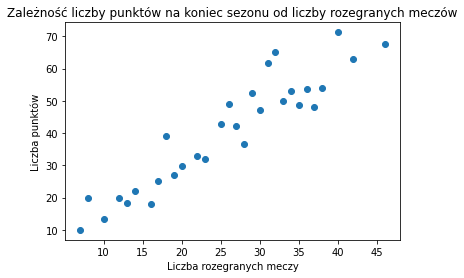

In [2]:
def return_the_mean_value(table, x_col, y_col):
    grouped_df = table.groupby(x_col)[y_col].mean().reset_index()
    grouped_df.drop_duplicates(subset=x_col, inplace=True)
    
    return grouped_df

points = 'Pkt'
number_of_matches = 'M'

grouped_df = return_the_mean_value(main_table, number_of_matches, points)
x = grouped_df[number_of_matches]
y = grouped_df[points]

plt.scatter(x, y)
plt.xlabel('Liczba rozegranych meczy')
plt.ylabel('Liczba punktów')
plt.title("Zależność liczby punktów na koniec sezonu od liczby rozegranych meczów")
    
plt.show()


Powyższa zależność pokazuje że średnia liczba punktów zdobyta przez kluby zdanej ligi jest wprost proporcjonalna do liczby rozegranych meczów. Dlatego w modelu będziemy obliczać średnią punktów na mecz jako wartość lub stosunek zdobytych punktów przez klub do sumy punktów zdobytych przez wszystkie kluby z ligi.

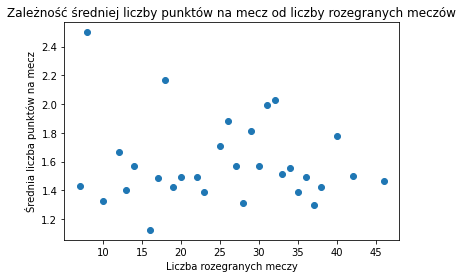

In [3]:
points_per_match = 'Średnia punktów na mecz'
number_of_matches = 'M'

grouped_df = return_the_mean_value(main_table, number_of_matches, points_per_match)
x = grouped_df[number_of_matches]
y = grouped_df[points_per_match]

plt.scatter(x, y)
plt.xlabel('Liczba rozegranych meczy')
plt.ylabel('Średnia liczba punktów na mecz')
plt.title("Zależność średniej liczby punktów na mecz od liczby rozegranych meczów")
    
plt.show()

Alternatywnie można by wyrazić wynik modelu w postaci stosunku punktów zdobytych przez drużyne przez sume punktów zdobytych przez wszystkie drużyny z ligi. Wielkość ta też będzie niezależna od liczby rozegranych meczów.

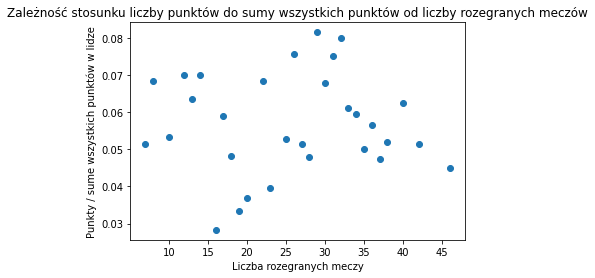

In [4]:
points_to_all_points = 'Punkty do sumy punktów ligi'
number_of_matches = 'M'

grouped_df = return_the_mean_value(main_table, number_of_matches, points_to_all_points)
x = grouped_df[number_of_matches]
y = grouped_df[points_to_all_points]

plt.scatter(x, y)
plt.xlabel('Liczba rozegranych meczy')
plt.ylabel('Punkty / sume wszystkich punktów w lidze')
plt.title("Zależność stosunku liczby punktów do sumy wszystkich punktów od liczby rozegranych meczów")
    
plt.show()

Oczywiście istnieje zależność między średnią punktów na mecz a stosunkiem punktów do sumy wszystkich punktów na mecz.

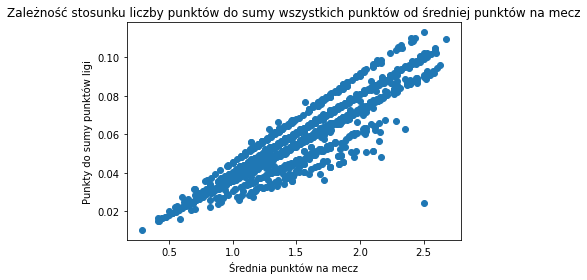

In [5]:
points_to_all_points = 'Punkty do sumy punktów ligi'
points_per_match = 'Średnia punktów na mecz'


plt.scatter(main_table[points_per_match], main_table[points_to_all_points])
plt.xlabel('Średnia punktów na mecz')
plt.ylabel('Punkty do sumy punktów ligi')
plt.title("Zależność stosunku liczby punktów do sumy wszystkich punktów od średniej punktów na mecz")
    
plt.show()

Narysujmy wykresy, które pozwolą nam ustalić jak duże są odchylenia standardowe dla danych ze względu na ligi klubów i czy zaproponowane alternatywy je niwelują, czy może nie ulegają zmianie.

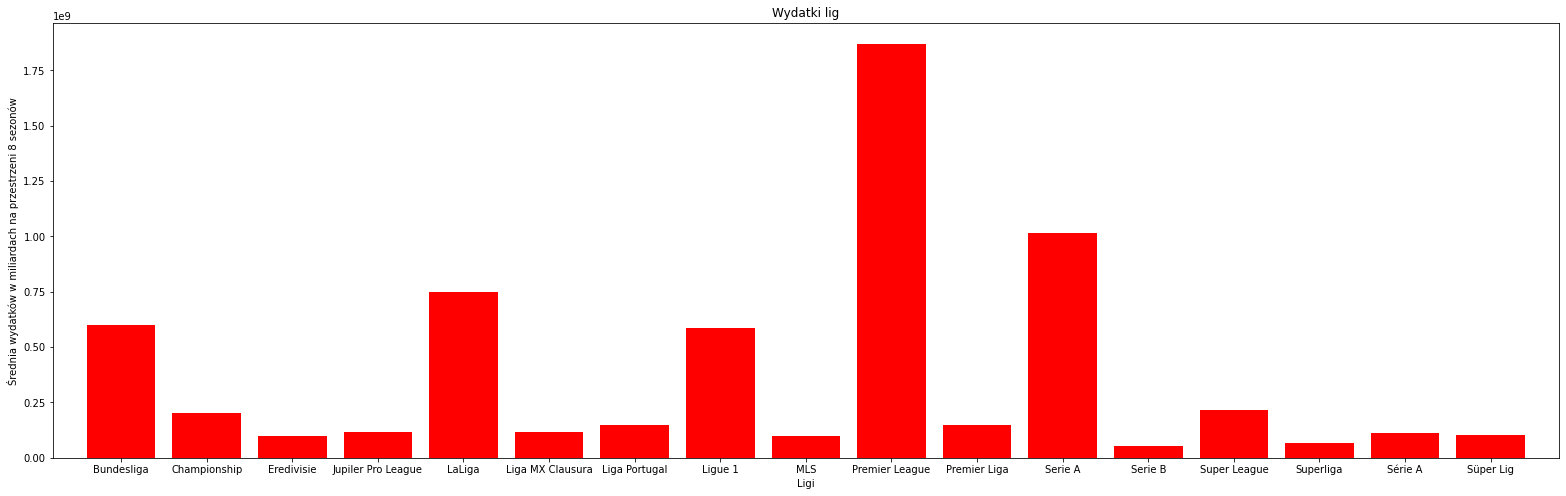

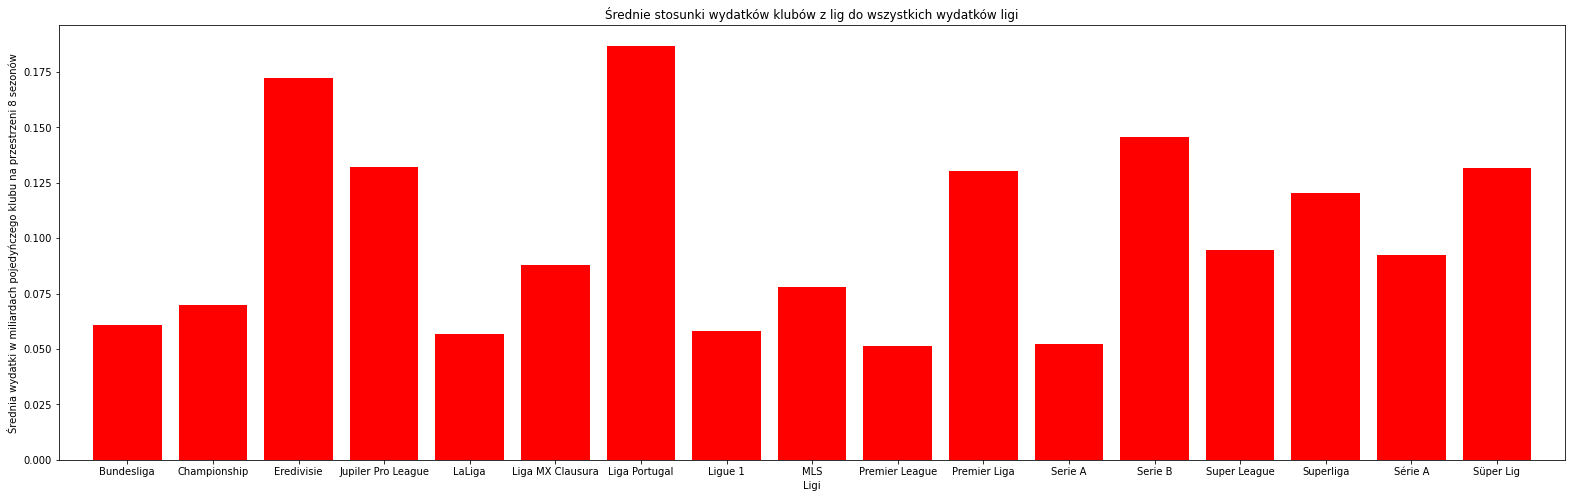

In [6]:
league_name = 'Rozgrywki'
outcome = 'Wydatki'

def draw_bar_for_leagues(x_col, y_col, xlabel, ylabel, title, color='blue'):
    fig, ax = plt.subplots(figsize=(27, 8))
    bar_width = 0.8
    plt.bar(x_col, y_col, color=color, width=bar_width)
    x_ticks = ax.get_xticks()
    ax.set_xlim(x_ticks[0] - bar_width, x_ticks[-1] + bar_width)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()
    
    
grouped_df_leg = return_the_mean_value(league_statistics, league_name, outcome)
draw_bar_for_leagues(grouped_df_leg[league_name], grouped_df_leg[outcome], 'Ligi', 'Średnia wydatków w miliardach na przestrzeni 8 sezonów', "Wydatki lig", 'red')

outcome_to_all = 'Wydatki do wydatków ligi'
grouped_df = return_the_mean_value(main_table, league_name, outcome_to_all)
draw_bar_for_leagues(grouped_df[league_name], grouped_df[outcome_to_all], 'Ligi', 'Średnia wydatki w miliardach pojedyńczego klubu na przestrzeni 8 sezonów', "Średnie stosunki wydatków klubów z lig do wszystkich wydatków ligi", 'red')


W przypadku pierwszego wykresu wyraźnie widać duże rozbieżności w wydatkach w każdej z lig. Dana bezwzględna kwota może być uznana jako duża lub jako mała w zależności jaką ligę rozpatrujemy. W przypadku drugiego wykresu różnice są znacznie mniejsze.

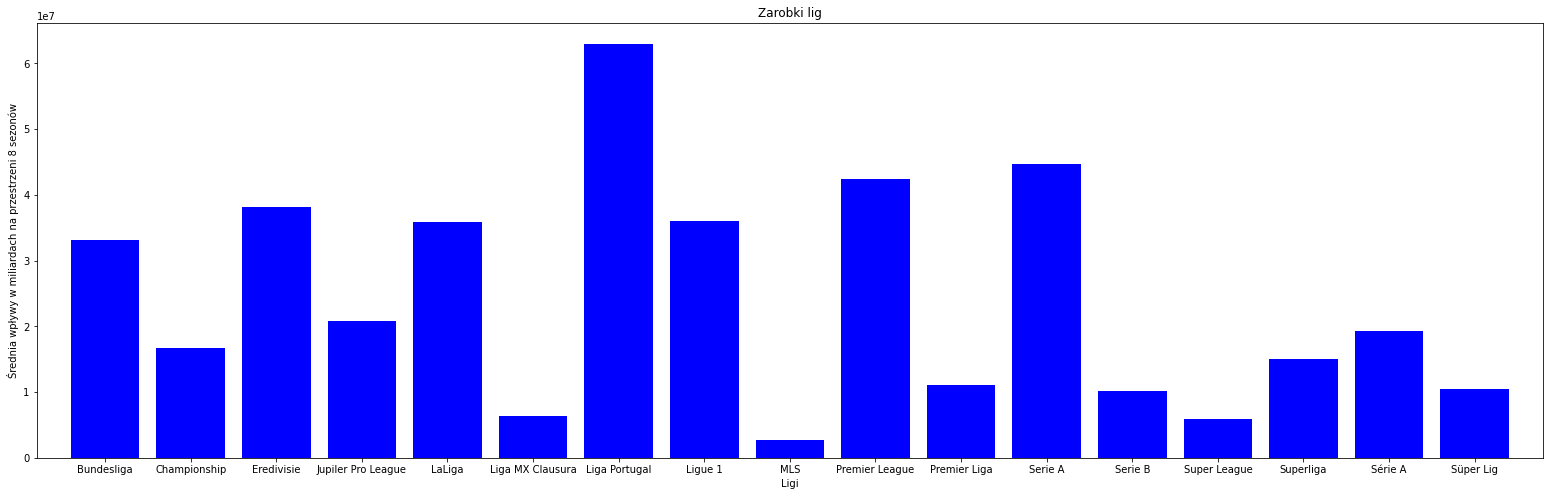

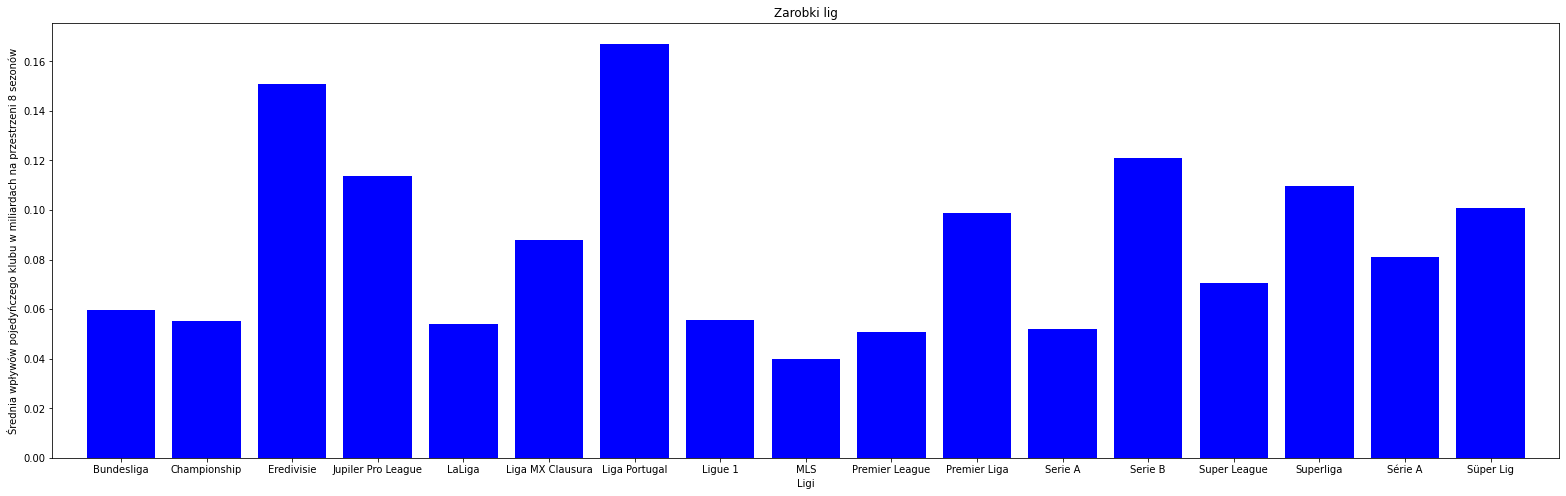

In [7]:
income = 'Wpływy'

grouped_df_leg_income = return_the_mean_value(main_table, league_name, income)
draw_bar_for_leagues(grouped_df_leg_income[league_name], grouped_df_leg_income[income], 'Ligi', 'Średnia wpływy w miliardach na przestrzeni 8 sezonów', "Zarobki lig")

income_to_all = 'Wpływy do wpływów ligi'
grouped_df_leg_income_2 = return_the_mean_value(main_table, league_name, income_to_all)
draw_bar_for_leagues(grouped_df_leg_income_2[league_name], grouped_df_leg_income_2[income_to_all], 'Ligi', 'Średnia wpływów pojedyńczego klubu w miliardach na przestrzeni 8 sezonów', "Zarobki lig")

Obserwujemy bardzo podobny wykres dotego dotyczącego wydatków lig. Duża rozbieżność w zależności od ligi, jednak w przypadku drugiego wykresu różnice między ligami nie są aż tak widoczne.

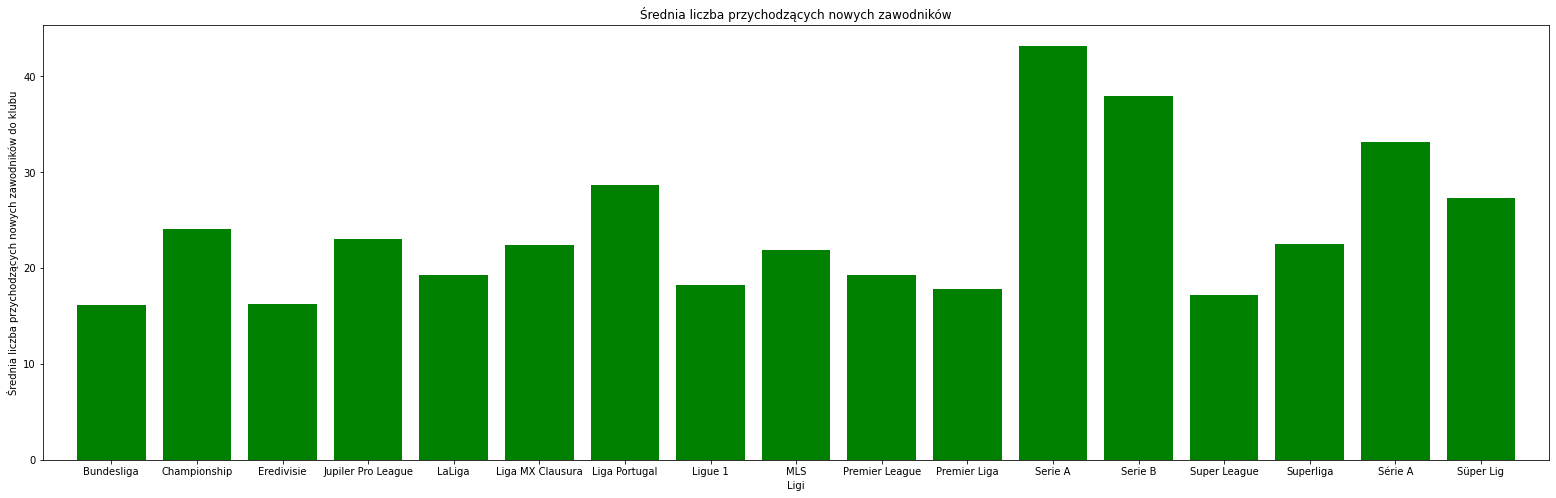

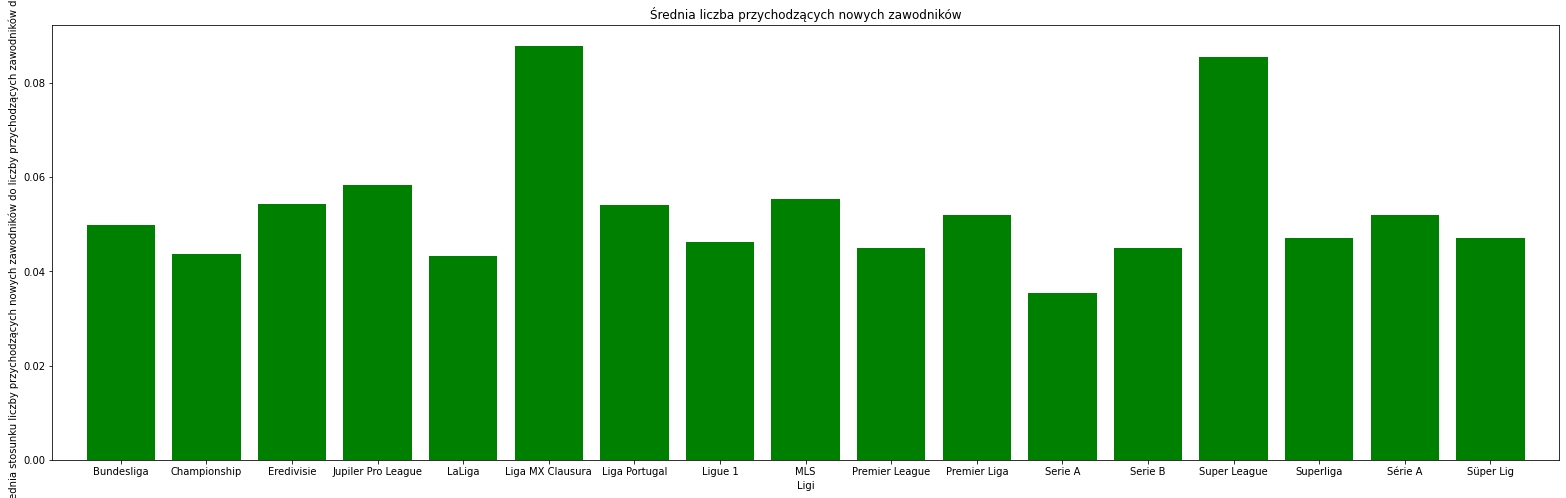

In [8]:
number_of_incoming_players = 'Zawodnicy przychodzący'

grouped_df_incoming_players = return_the_mean_value(main_table, league_name, number_of_incoming_players)
draw_bar_for_leagues(grouped_df_incoming_players[league_name],
                     grouped_df_incoming_players[number_of_incoming_players], 'Ligi',
                    'Średnia liczba przychodzących nowych zawodników do klubu',
                    "Średnia liczba przychodzących nowych zawodników",
                    'green')

ratio_of_incoming_players_to_all = 'Liczba przychodzących zawodników do zawodników przychodzących w całej lidze'
grouped_df_incoming_players_ratio = return_the_mean_value(main_table, league_name, ratio_of_incoming_players_to_all)
draw_bar_for_leagues(grouped_df_incoming_players_ratio[league_name],
                    grouped_df_incoming_players_ratio[ratio_of_incoming_players_to_all], 'Ligi',
                    'Średnia stosunku liczby przychodzących nowych zawodników do liczby przychodzących zawodników do ligi',
                    "Średnia liczba przychodzących nowych zawodników",
                    'green')

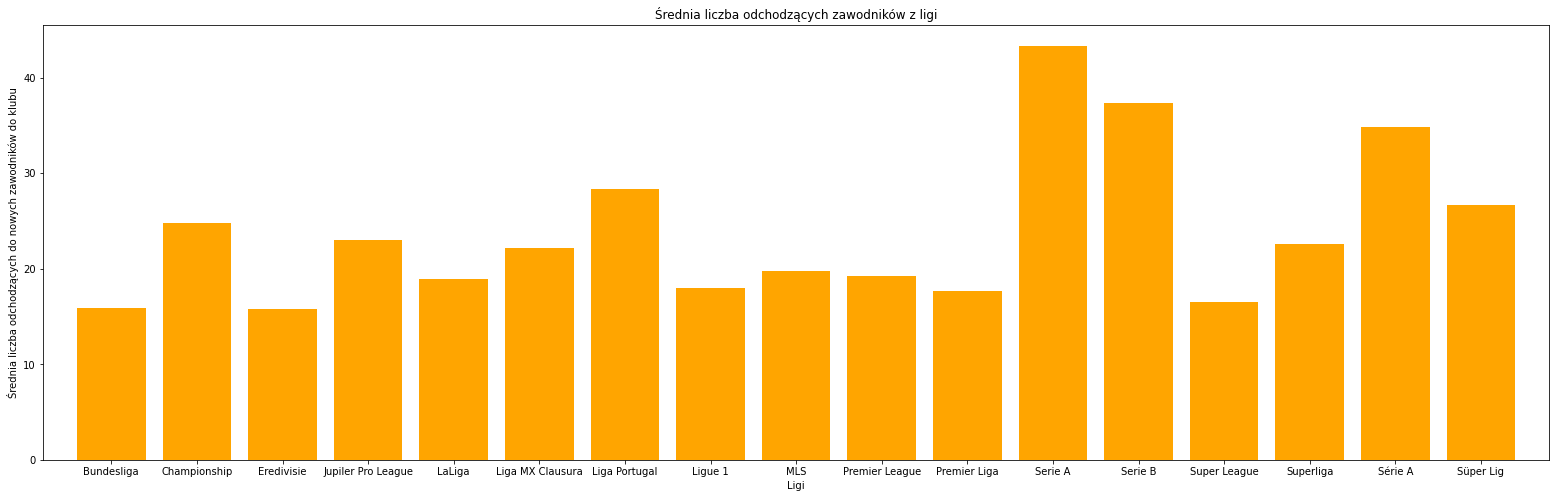

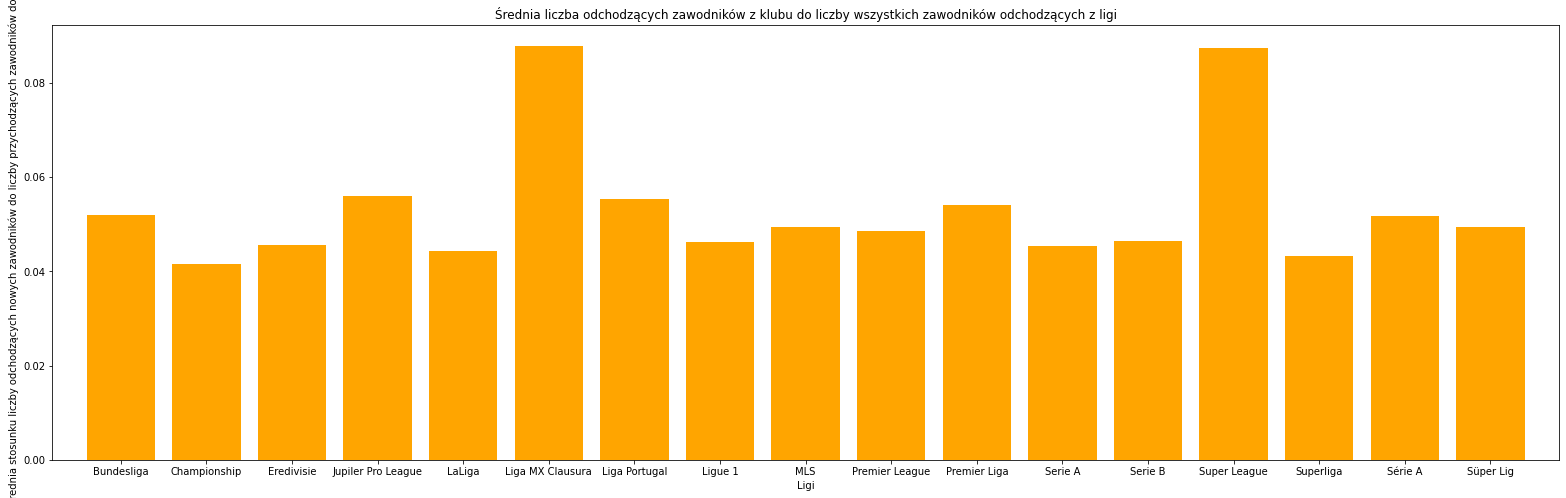

In [9]:
number_of_outcoming_players = 'Zawodnicy odchodzący'

grouped_df_incoming_players = return_the_mean_value(main_table, league_name, number_of_outcoming_players)
draw_bar_for_leagues(grouped_df_incoming_players[league_name],
                     grouped_df_incoming_players[number_of_outcoming_players], 'Ligi',
                    'Średnia liczba odchodzących do nowych zawodników do klubu',
                    'Średnia liczba odchodzących zawodników z ligi',
                    'orange')

ratio_of_outcoming_players_to_all = 'Liczba odchodzących zawodników do zawodników odchodzących w całej lidze'
grouped_df_outcoming_players_ratio = return_the_mean_value(main_table, league_name,
                                                          ratio_of_outcoming_players_to_all)
draw_bar_for_leagues(grouped_df_outcoming_players_ratio[league_name],
                    grouped_df_outcoming_players_ratio[ratio_of_outcoming_players_to_all], 'Ligi',
                    'Średnia stosunku liczby odchodzących nowych zawodników do liczby przychodzących zawodników do ligi',
                    'Średnia liczba odchodzących zawodników z klubu do liczby wszystkich zawodników odchodzących z ligi',
                    'orange')

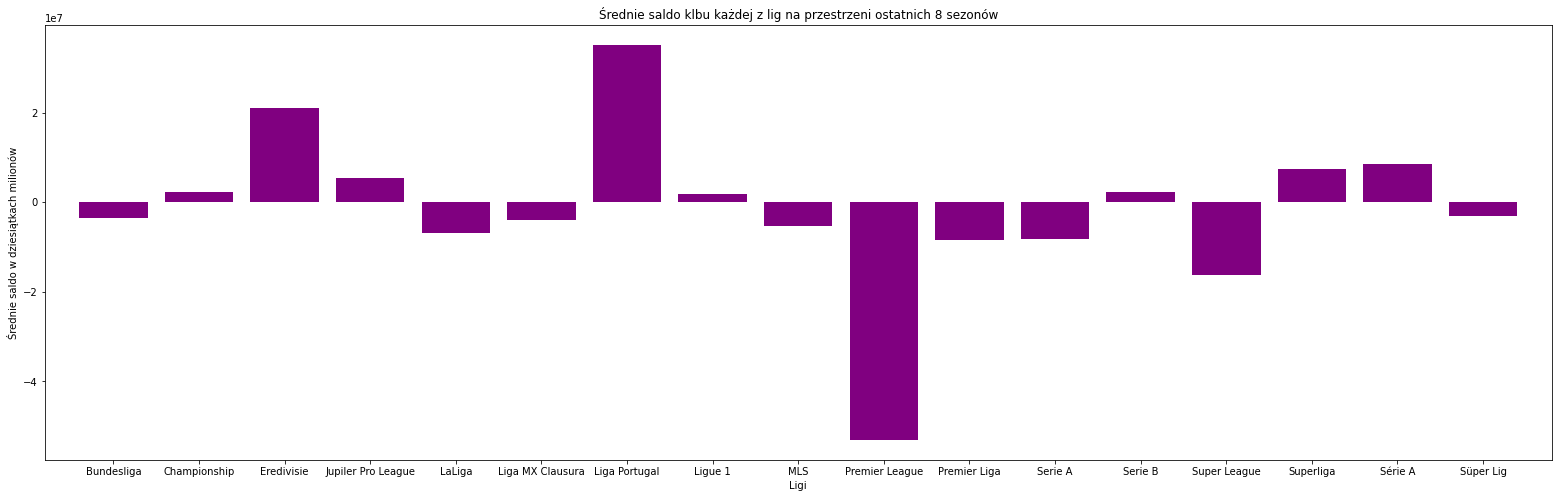

In [10]:
balance = 'Saldo'
grouped_balance = return_the_mean_value(main_table, league_name, balance)
draw_bar_for_leagues(grouped_balance[league_name], grouped_balance[balance], 'Ligi', "Średnie saldo w dziesiątkach milionów", "Średnie saldo klbu każdej z lig na przestrzeni ostatnich 8 sezonów", "purple")


Poniższa funkcja generuje wykres typu bar, dzieląc dane na tzw. kubełki i dla każdej wartości dla argumentów w kubełku wylicza średnią i umieszcza ją na wykresie

In [11]:
def generate_bucketed_bar(df, x_column, y_column, bin_width):
    bins = np.arange(df[x_column].min(), df[x_column].max() + bin_width, bin_width)
    labels = bins[:-1] + bin_width / 2

    df['Bucket'] = pd.cut(df[x_column], bins=bins, labels=labels, include_lowest=True)

    grouped_df = df.groupby('Bucket')[y_column].mean()

    plt.figure(figsize=(10, 6))
    plt.bar(grouped_df.index, grouped_df.values, width=bin_width * 0.8)
    plt.title(f'Średnia {y_column} w zależności od {x_column} (Podzielone na kubełki)')
    plt.xlabel(x_column)
    plt.ylabel(f'Średnia {y_column}')
    plt.grid(True)
    plt.show()
    


# Wykresy oparte na danych względnych

Ta sekcja jest przeznaczona prezentacji wykładów właściwych, które zaprezentują zależności między danymi względnymi (stosunkami) co pozwoli zbudować jak najbardziej dokładny model.

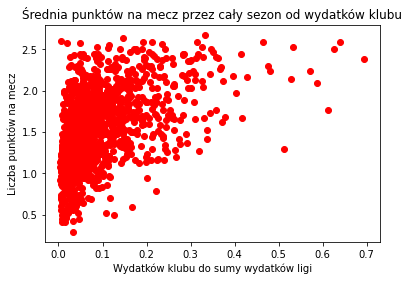

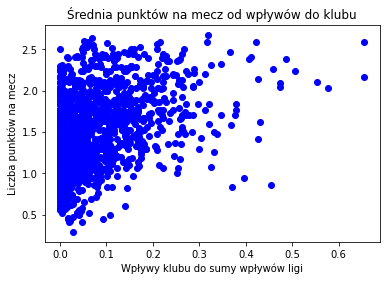

In [12]:
def draw_scatter(table, x, y, xlabel, ylabel, title, color='blue'):
    plt.scatter(table[x], table[y], color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

draw_scatter(main_table, 'Wydatki do wydatków ligi', 'Średnia punktów na mecz',
                 'Wydatków klubu do sumy wydatków ligi',
                 'Liczba punktów na mecz', 'Średnia punktów na mecz przez cały sezon od wydatków klubu',
                 'red')
draw_scatter(main_table, 'Wpływy do wpływów ligi', 'Średnia punktów na mecz',
                 'Wpływy klubu do sumy wpływów ligi',
                 'Liczba punktów na mecz', 'Średnia punktów na mecz od wpływów do klubu')

Powyższy wykres typu scatter jest bardzo zagęszczony dla argumentów między 0.0 a 0.2, dlatego przedstawmy wykres w postaci logarytmnicznej.

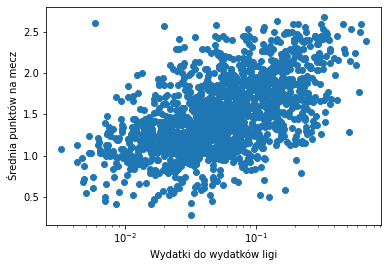

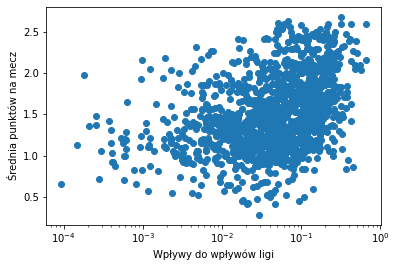

In [13]:
def scatter_log(table, x, y, title):
    plt.scatter(table[x], table[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xscale('log')
   # plt.yscale('log')
    plt.title(title)
    
    plt.show()

    
scatter_log(main_table, 'Wydatki do wydatków ligi', 'Średnia punktów na mecz', '')
scatter_log(main_table, 'Wpływy do wpływów ligi', 'Średnia punktów na mecz', '')

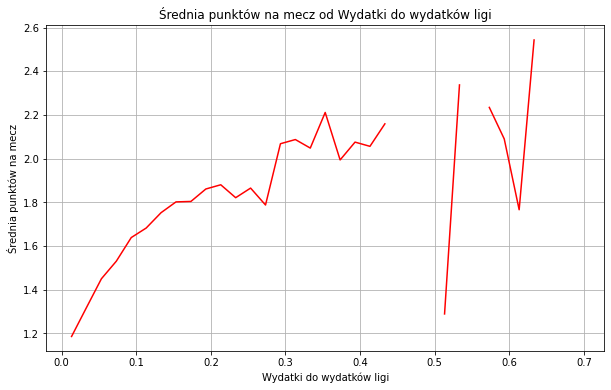

In [14]:
   
def plot(df, x_column, y_column, bin_width, color='blue'):
    bins = np.arange(df[x_column].min(), df[x_column].max() + bin_width, bin_width)
    labels = bins[:-1] + bin_width / 2

    df['Bucket'] = pd.cut(df[x_column], bins=bins, labels=labels, include_lowest=True)

    grouped_df = df.groupby('Bucket')[y_column].mean()
    
    plt.figure(figsize=(10, 6))
    plt.plot(grouped_df.index, grouped_df.values, color=color)
    plt.title(f'{y_column} od {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()
    
plot(main_table, 'Wydatki do wydatków ligi', 'Średnia punktów na mecz', bin_width=0.02, color='red')


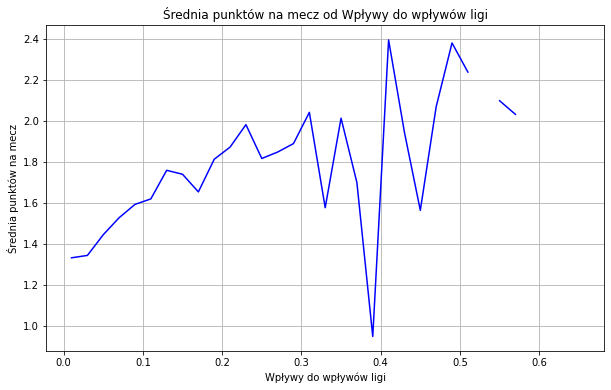

In [15]:
plot(main_table, 'Wpływy do wpływów ligi', 'Średnia punktów na mecz', bin_width=0.02)

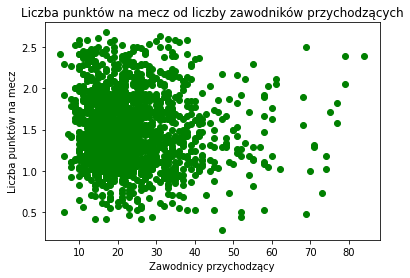

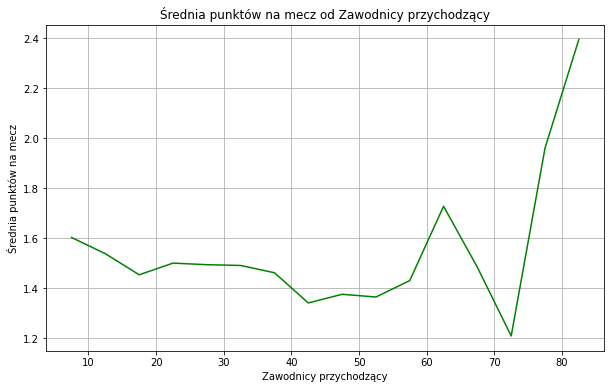

In [16]:
draw_scatter(main_table, 'Zawodnicy przychodzący', 
             'Średnia punktów na mecz', 
             'Zawodnicy przychodzący', 
             'Liczba punktów na mecz', 
             'Liczba punktów na mecz od liczby zawodników przychodzących',
             'green')
plot(main_table, 'Zawodnicy przychodzący', 'Średnia punktów na mecz', bin_width=5, color='green')


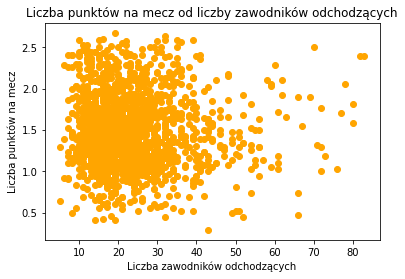

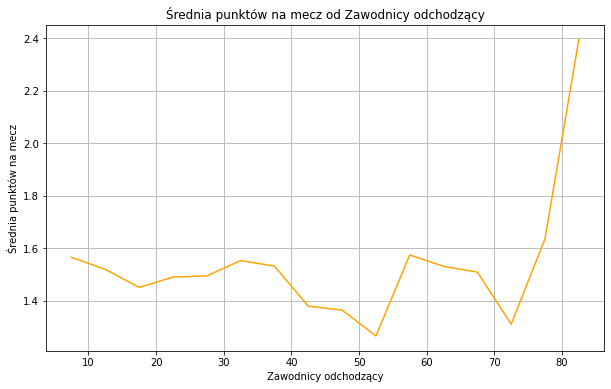

In [17]:
draw_scatter(main_table, 'Zawodnicy odchodzący', 
             'Średnia punktów na mecz', 
             'Liczba zawodników odchodzących', 
             'Liczba punktów na mecz', 
             'Liczba punktów na mecz od liczby zawodników odchodzących',
             'orange')
plot(main_table, 'Zawodnicy odchodzący', 'Średnia punktów na mecz', bin_width=5, color='orange')


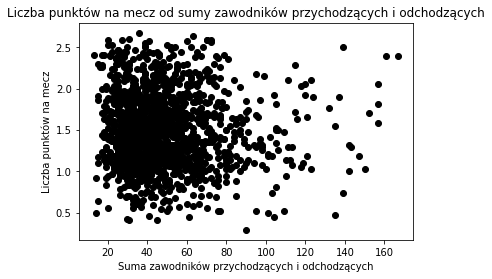

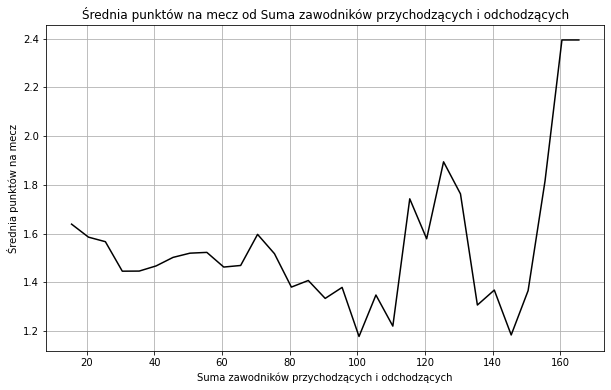

In [18]:
draw_scatter(main_table, 'Suma zawodników przychodzących i odchodzących', 
             'Średnia punktów na mecz', 
             'Suma zawodników przychodzących i odchodzących', 
             'Liczba punktów na mecz', 
             'Liczba punktów na mecz od sumy zawodników przychodzących i odchodzących',
             'black')




plot(main_table, 'Suma zawodników przychodzących i odchodzących', 'Średnia punktów na mecz', bin_width=5, color='black')


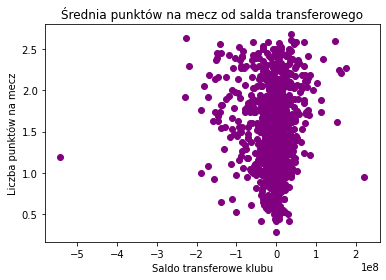

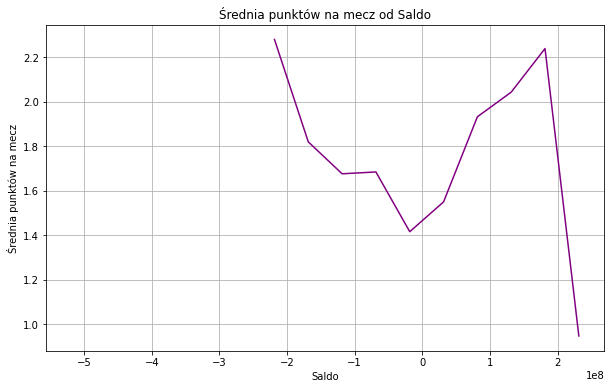

In [19]:
draw_scatter(main_table, 'Saldo', 
             'Średnia punktów na mecz', 
             'Saldo transferowe klubu', 
             'Liczba punktów na mecz', 
             'Średnia punktów na mecz od salda transferowego',
             'purple')

plot(main_table, 'Saldo', 'Średnia punktów na mecz', bin_width=0.5*10**8, color='purple')

Z powyższych wykresów wynika, że dane:

    - liczba zawodników przychodzących
    
    - liczba zawodników odchodzących
    
    - suma liczby zawodników przychodzących i odchodzących
nie mają wpływu na średnią liczbę punktów na mecz

Między pozostałymi danymi a średnią liczbą punktów istnieje korelacja.
